In [33]:
import pandas

# Carregar dataset
df = pandas.read_csv("crocodile_dataset.csv")

# Visualizar primeiras linhas
df.head()


,Observation ID,Common Name,Scientific Name,Family,Genus,Observed Length (m),Observed Weight (kg),Age Class,Sex,Date of Observation,Country/Region,Habitat Type,Conservation Status,Observer Name,Notes
0,1,Morelet's Crocodile,Crocodylus moreletii,Crocodylidae,Crocodylus,1.90,62.0,Adult,Male,31-03-2018,Belize,Swamps,Least Concern,Allison Hill,Cause bill scientist nation opportunity.
1,2,American Crocodile,Crocodylus acutus,Crocodylidae,Crocodylus,4.09,334.5,Adult,Male,28-01-2015,Venezuela,Mangroves,Vulnerable,Brandon Hall,Ago current practice nation determine operatio...
2,3,Orinoco Crocodile,Crocodylus intermedius,Crocodylidae,Crocodylus,1.08,118.2,Juvenile,Unknown,07-12-2010,Venezuela,Flooded Savannas,Critically Endangered,Melissa Peterson,Democratic shake bill here grow gas enough ana...
3,4,Morelet's Crocodile,Crocodylus moreletii,Crocodylidae,Crocodylus,2.42,90.4,Adult,Male,01-11-2019,Mexico,Rivers,Least Concern,Edward Fuller,Officer relate animal direction eye bag do.
4,5,Mugger Crocodile (Marsh Crocodile),Crocodylus palustris,Crocodylidae,Crocodylus,3.75,269.4,Adult,Unknown,15-07-2019,India,Rivers,Vulnerable,Donald Reid,Class great prove reduce raise author play mov...


Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Observation ID        1000 non-null   int64  
 1   Common Name           1000 non-null   object 
 2   Scientific Name       1000 non-null   object 
 3   Family                1000 non-null   object 
 4   Genus                 1000 non-null   object 
 5   Observed Length (m)   1000 non-null   float64
 6   Observed Weight (kg)  1000 non-null   float64
 7   Age Class             1000 non-null   object 
 8   Sex                   1000 non-null   object 
 9   Date of Observation   1000 non-null   object 
 10  Country/Region        1000 non-null   object 
 11  Habitat Type          1000 non-null   object 
 12  Conservation Status   1000 non-null   object 
 13  Observer Name         1000 non-null   object 
 14  Notes                 1000 non-null   object 
dty

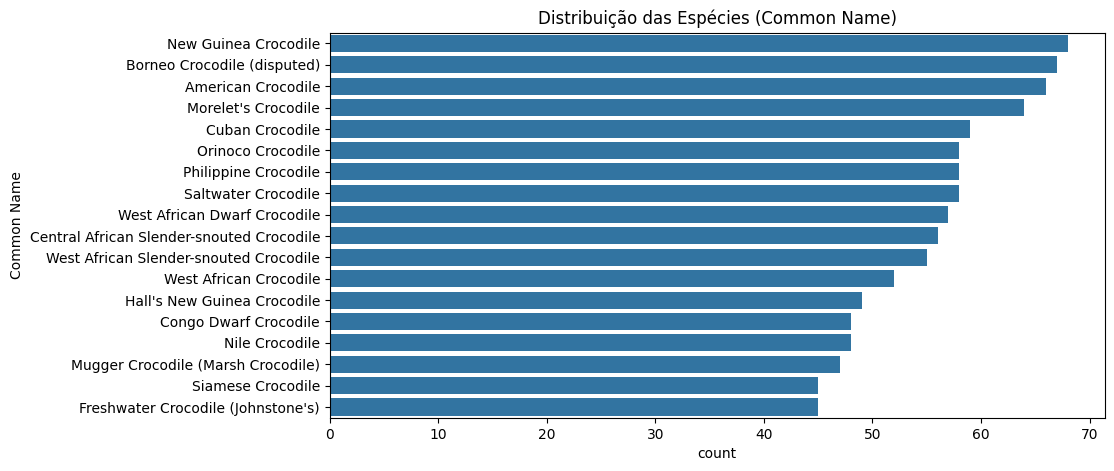

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns


print("Informações do dataset:")
print(df.info())

# Distribuição da variável alvo
plt.figure(figsize=(10,5))
sns.countplot(y=df["Common Name"], order=df["Common Name"].value_counts().index)
plt.title("Distribuição das Espécies (Common Name)")
plt.show()


In [35]:
from sklearn.model_selection import train_test_split

cols_drop = ["Observation ID", "Scientific Name", "Observer Name", "Notes", "Date of Observation"]
df_clean = df.drop(columns=cols_drop)

X = df_clean.drop(columns=["Common Name"])
y = df_clean["Common Name"]

X = pandas.get_dummies(X, drop_first=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Shape treino:", X_train.shape, " | Shape teste:", X_test.shape)


Shape treino: (700, 87)  | Shape teste: (300, 87)


Acurácia Decision Tree: 0.93

Relatório de Classificação:
                                            precision    recall  f1-score   support

                       American Crocodile       1.00      1.00      1.00        20
              Borneo Crocodile (disputed)       1.00      1.00      1.00        20
Central African Slender-snouted Crocodile       1.00      1.00      1.00        17
                    Congo Dwarf Crocodile       1.00      1.00      1.00        14
                          Cuban Crocodile       1.00      1.00      1.00        18
       Freshwater Crocodile (Johnstone's)       0.82      0.64      0.72        14
              Hall's New Guinea Crocodile       0.75      1.00      0.86        15
                      Morelet's Crocodile       0.61      0.74      0.67        19
       Mugger Crocodile (Marsh Crocodile)       1.00      1.00      1.00        14
                     New Guinea Crocodile       1.00      0.75      0.86        20
                           

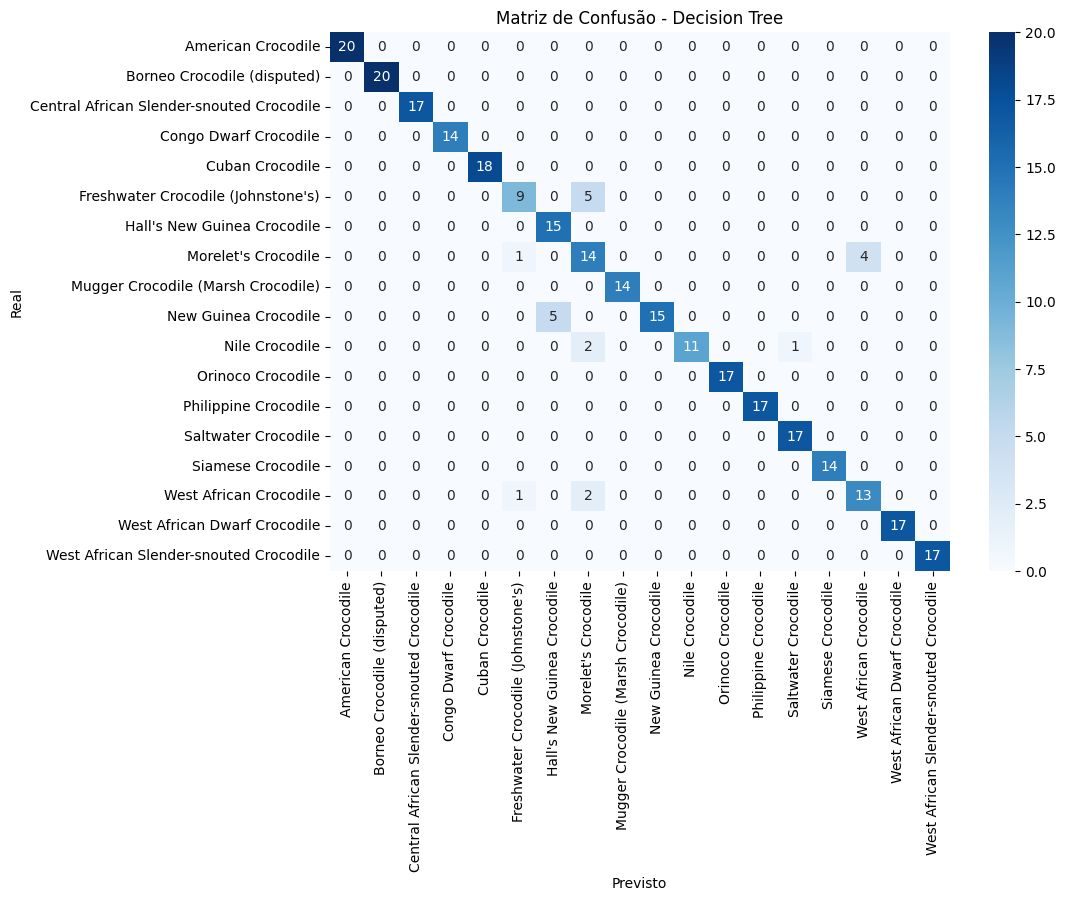

In [36]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

print("Acurácia Decision Tree:", accuracy_score(y_test, y_pred_dt))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_dt))

cm = confusion_matrix(y_test, y_pred_dt, labels=dt_model.classes_)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=dt_model.classes_,
            yticklabels=dt_model.classes_)
plt.title("Matriz de Confusão - Decision Tree")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()


Acurácia KNN: 0.36666666666666664

Relatório de Classificação:
                                            precision    recall  f1-score   support

                       American Crocodile       0.26      0.45      0.33        20
              Borneo Crocodile (disputed)       0.25      0.35      0.29        20
Central African Slender-snouted Crocodile       0.46      0.35      0.40        17
                    Congo Dwarf Crocodile       0.83      0.71      0.77        14
                          Cuban Crocodile       0.19      0.28      0.23        18
       Freshwater Crocodile (Johnstone's)       0.25      0.36      0.29        14
              Hall's New Guinea Crocodile       0.36      0.33      0.34        15
                      Morelet's Crocodile       0.43      0.32      0.36        19
       Mugger Crocodile (Marsh Crocodile)       0.33      0.07      0.12        14
                     New Guinea Crocodile       0.32      0.30      0.31        20
                      

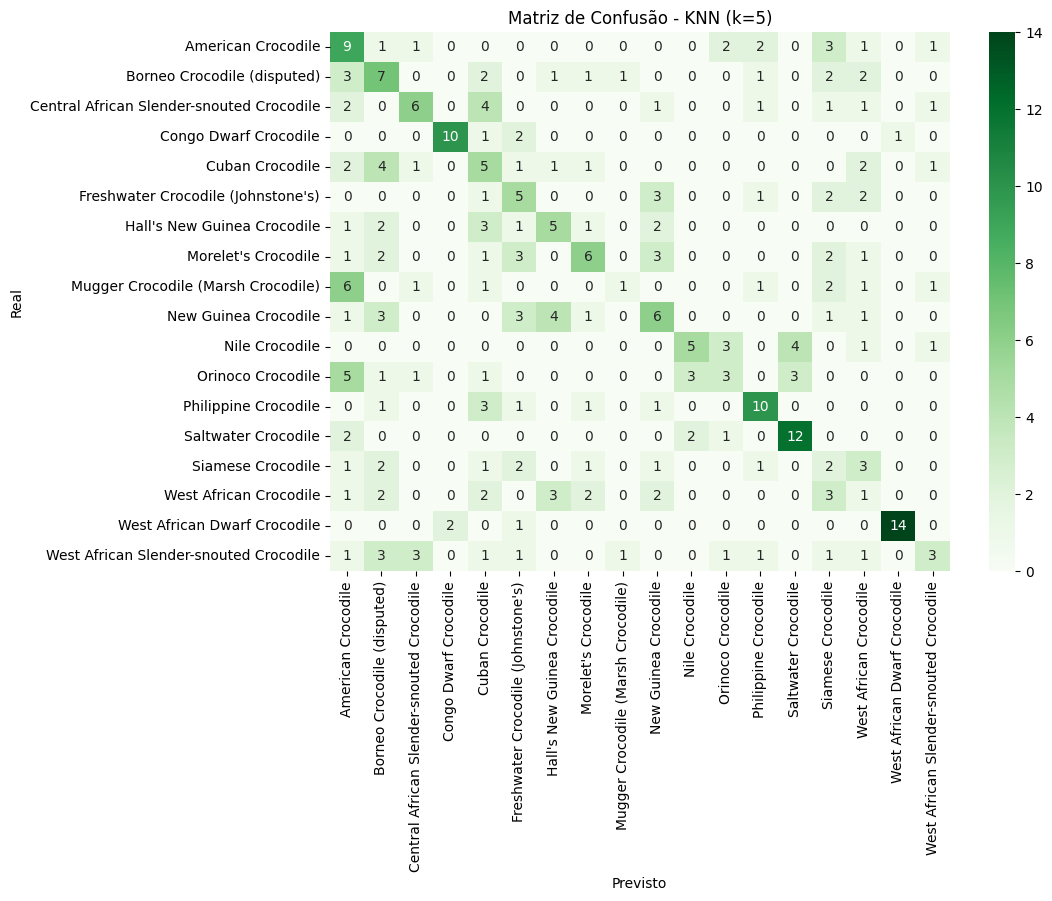

In [37]:
from sklearn.neighbors import KNeighborsClassifier

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)

print("Acurácia KNN:", accuracy_score(y_test, y_pred_knn))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_knn))

cm = confusion_matrix(y_test, y_pred_knn, labels=knn_model.classes_)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens",
            xticklabels=knn_model.classes_,
            yticklabels=knn_model.classes_)
plt.title("Matriz de Confusão - KNN (k=5)")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()


/home/seaw/Documentos/Estudos/IA/Ativade-dataset/venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Acurácia Logistic Regression: 0.9766666666666667

Relatório de Classificação:
                                            precision    recall  f1-score   support

                       American Crocodile       1.00      1.00      1.00        20
              Borneo Crocodile (disputed)       1.00      1.00      1.00        20
Central African Slender-snouted Crocodile       1.00      1.00      1.00        17
                    Congo Dwarf Crocodile       1.00      1.00      1.00        14
                          Cuban Crocodile       1.00      1.00      1.00        18
       Freshwater Crocodile (Johnstone's)       1.00      0.93      0.96        14
              Hall's New Guinea Crocodile       0.71      1.00      0.83        15
                      Morelet's Crocodile       0.95      1.00      0.97        19
       Mugger Crocodile (Marsh Crocodile)       1.00      1.00      1.00        14
                     New Guinea Crocodile       1.00      0.70      0.82        20
       

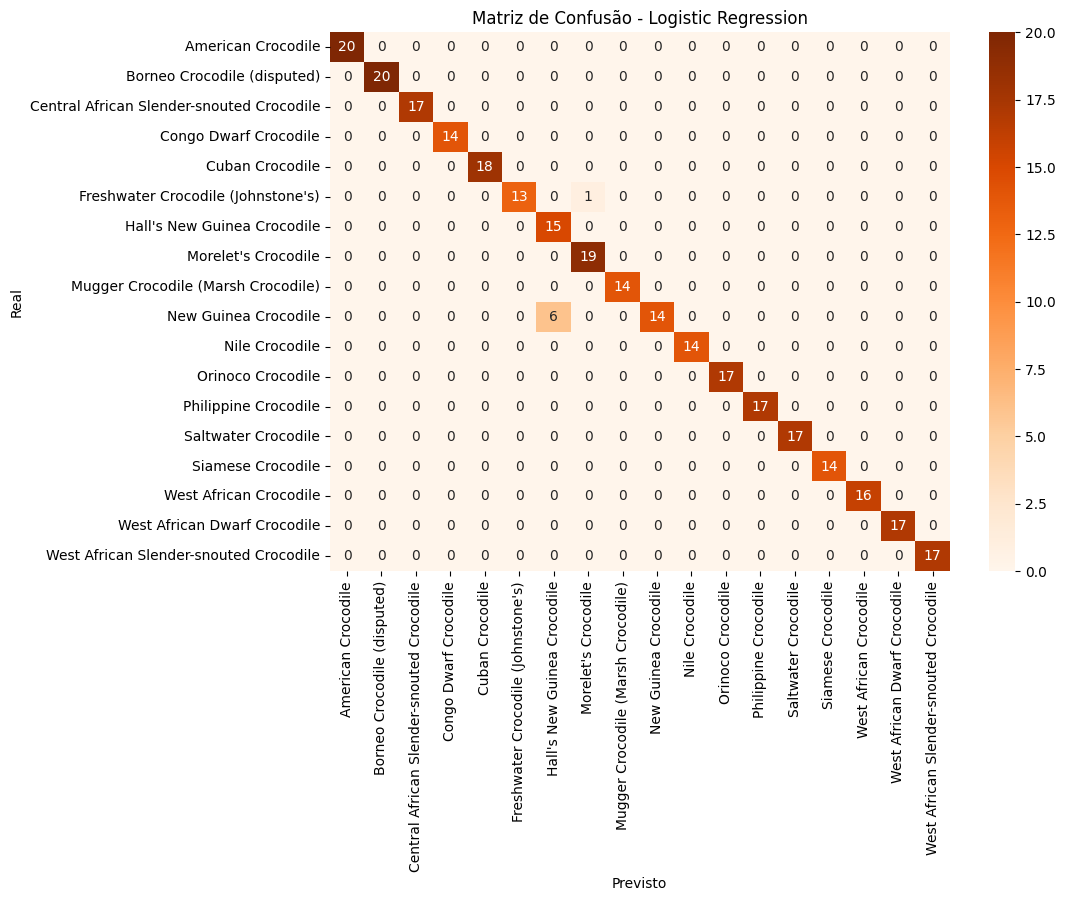

In [38]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(max_iter=1000, random_state=42)
log_model.fit(X_train, y_train)

y_pred_log = log_model.predict(X_test)

print("Acurácia Logistic Regression:", accuracy_score(y_test, y_pred_log))
print("\nRelatório de Classificação:\n", classification_report(y_test, y_pred_log))

cm = confusion_matrix(y_test, y_pred_log, labels=log_model.classes_)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges",
            xticklabels=log_model.classes_,
            yticklabels=log_model.classes_)
plt.title("Matriz de Confusão - Logistic Regression")
plt.xlabel("Previsto")
plt.ylabel("Real")
plt.show()

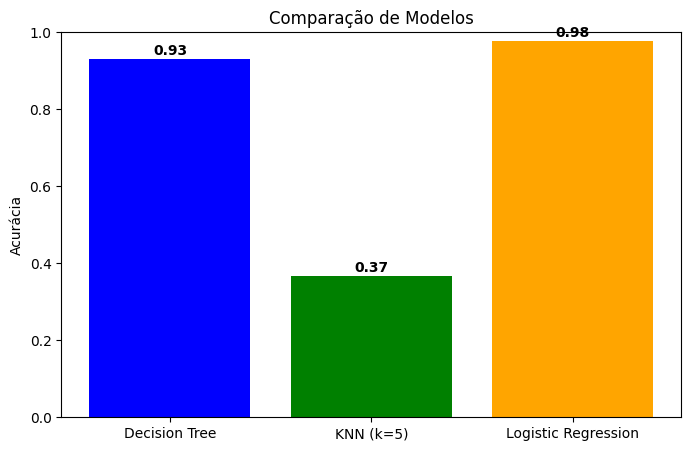

{'Decision Tree': 0.93,
 'KNN (k=5)': 0.36666666666666664,
 'Logistic Regression': 0.9766666666666667}

In [ ]:
acc_dt = accuracy_score(y_test, y_pred_dt)
acc_knn = accuracy_score(y_test, y_pred_knn)
acc_log = accuracy_score(y_test, y_pred_log)

results = {
    "Decision Tree": acc_dt,
    "KNN (k=5)": acc_knn,
    "Logistic Regression": acc_log
}

plt.figure(figsize=(8,5))
plt.bar(results.keys(), results.values(), color=["blue", "green", "orange"])
plt.ylabel("Acurácia")
plt.title("Comparação de Modelos")
plt.ylim(0,1)
for i, v in enumerate(results.values()):
    plt.text(i, v + 0.01, f"{v:.2f}", ha="center", fontweight="bold")
plt.show()

results
